# 13.Cluster the stations based on facilities. What type of stations exist? Are some stations ‘odd’ in the facilities they provide? What would you suggest to do with these? Is there a correlation between station type and number of daily trains?

In [5]:
import src.data_processing.data as data
from mlxtend.frequent_patterns import apriori

Some odd stations for example supply wheelchairs but no disabled parking spots or elevators
Escalator up but no escalator down


Escalator up but no escalator down and vice versa

In [17]:
facilities = data.facilities
facilities["odd_escalator"] = 0
facilities.loc[(facilities["escalator_up"] == 1) & (facilities["escalator_down"] == 0), "odd_escalator"] = 1
facilities.loc[(facilities["escalator_up"] == 0) & (facilities["escalator_down"] == 1), "odd_escalator"] = 1


Wheelchairs but no disabled parking spots and vice versa

In [18]:
facilities["wheelchair_odd"] = 0
facilities.loc[(facilities["disabled_parking_spots"] == 1) & (facilities["wheelchair_available"] == 0), "wheelchair_odd"] = 1
facilities.loc[(facilities["disabled_parking_spots"] == 0) & (facilities["wheelchair_available"] == 1), "wheelchair_odd"] = 1


No ticket vending machine
No public transport

In [19]:
facilities["transport_odd"] = 0
facilities.loc[(facilities["bus"] == 0) & (facilities["tram"] == 0) & (facilities["metro"] == 0) & (facilities["taxi"] == 0), "transport_odd"] = 1

Wheelchair but no escalators

In [20]:
facilities["esc_wheel_odd"] = 0
facilities.loc[(facilities["wheelchair_available"] == 1) & (facilities["escalator_up"] == 0) & (facilities["escalator_down"] == 0), "esc_wheel_odd"] = 1


Blue bike but no bicycle spots

In [21]:
facilities["bicycle_odd"] = 0
facilities.loc[(facilities["blue-bike"] == 1) & (facilities["bicycle_spots"] == 0), "bicycle_odd"] = 1

In [22]:

only_facilities= facilities[['ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop', 'odd_escalator' ,'wheelchair_odd', 'transport_odd', 'esc_wheel_odd', 'bicycle_odd' ]]
only_facilities

,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,blue-bike,bus,tram,metro,wheelchair_available,...,elevated_platform,escalator_up,escalator_down,elevator_platform,audio_induction_loop,odd_escalator,wheelchair_odd,transport_odd,esc_wheel_odd,bicycle_odd
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0,0,0,1,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0
5,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0
669,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0
670,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
672,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0


We would suggest to supply their missing counterparts for these stations
We can check if the satisfaction score changes a lot for these stations:


In [26]:
satisfaction = data.satisfaction
facilities = facilities.merge(satisfaction, left_on = "name", right_on = "station")
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,odd_escalator,odd,wheelchair_odd,transport_odd,esc_wheel_odd,parking_odd,bicycle_odd,Unnamed: 0,station,Avg Satisfaction
0,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0,NaN,0,0,1,0,0,103,aalst,60.77
1,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0,NaN,0,1,0,0,0,517,aalst-kerrebroek,49.97
2,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0,NaN,1,0,0,0,0,353,aalter,60.18
3,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0,NaN,0,0,1,0,0,569,aarschot,55.54
4,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0,NaN,0,1,0,0,0,92,aarsele,27.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0,NaN,1,1,0,0,0,559,zolder,57.43
522,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0,NaN,1,1,0,0,0,495,zonhoven,39.39
523,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0,NaN,0,0,1,0,0,276,zottegem,48.90
524,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0,NaN,0,1,0,0,0,301,zwijndrecht,49.58


We see that all have a different mean that is significant, but only the odd facilities without odd_transport have a siginifcant larger mean.
Therefore, we suggest to provide bus/tram/metro/taxi in these stations

In [36]:
from scipy import stats
print(stats.ttest_ind(facilities[facilities["odd_escalator"] == 1]["Avg Satisfaction"], facilities[facilities["odd_escalator"] == 0]["Avg Satisfaction"]))
print("Mean of stations with odd_escalator: ", facilities[facilities["odd_escalator"] == 1]["Avg Satisfaction"].mean())
print("Mean of stations without odd_escalator: ", facilities[facilities["odd_escalator"] == 0]["Avg Satisfaction"].mean())

print(stats.ttest_ind(facilities[facilities["wheelchair_odd"] == 1]["Avg Satisfaction"], facilities[facilities["wheelchair_odd"] == 0]["Avg Satisfaction"]))
print("Mean of stations with wheelchair_odd: ", facilities[facilities["wheelchair_odd"] == 1]["Avg Satisfaction"].mean())
print("Mean of stations without wheelchair_odd: ", facilities[facilities["wheelchair_odd"] == 0]["Avg Satisfaction"].mean())

print(stats.ttest_ind(facilities[facilities["transport_odd"] == 1]["Avg Satisfaction"], facilities[facilities["transport_odd"] == 0]["Avg Satisfaction"]))
print("Mean of stations with transport_odd: ", facilities[facilities["transport_odd"] == 1]["Avg Satisfaction"].mean())
print("Mean of stations without transport_odd: ", facilities[facilities["transport_odd"] == 0]["Avg Satisfaction"].mean())


print(stats.ttest_ind(facilities[facilities["esc_wheel_odd"] == 1]["Avg Satisfaction"], facilities[facilities["esc_wheel_odd"] == 0]["Avg Satisfaction"]))
print("Mean of stations with esc_wheel_odd: ", facilities[facilities["esc_wheel_odd"] == 1]["Avg Satisfaction"].mean())
print("Mean of stations without esc_wheel_odd: ", facilities[facilities["esc_wheel_odd"] == 0]["Avg Satisfaction"].mean())


print(stats.ttest_ind(facilities[facilities["parking_odd"] == 1]["Avg Satisfaction"], facilities[facilities["parking_odd"] == 0]["Avg Satisfaction"]))
print("Mean of stations with parking_odd: ", facilities[facilities["parking_odd"] == 1]["Avg Satisfaction"].mean())
print("Mean of stations without parking_odd: ", facilities[facilities["parking_odd"] == 0]["Avg Satisfaction"].mean())


print(stats.ttest_ind(facilities[facilities["bicycle_odd"] == 1]["Avg Satisfaction"], facilities[facilities["bicycle_odd"] == 0]["Avg Satisfaction"]))
print("Mean of stations with bicycle_odd: ", facilities[facilities["bicycle_odd"] == 1]["Avg Satisfaction"].mean())
print("Mean of stations without bicycle_odd: ", facilities[facilities["bicycle_odd"] == 0]["Avg Satisfaction"].mean())



Ttest_indResult(statistic=3.5225143595752826, pvalue=0.000464808744581967)
Mean of stations with odd_escalator:  57.61903225806453
Mean of stations without odd_escalator:  46.976020202020194
Ttest_indResult(statistic=5.615205345977774, pvalue=3.1885590589631156e-08)
Mean of stations with wheelchair_odd:  53.18752873563219
Mean of stations without wheelchair_odd:  44.84286931818181
Ttest_indResult(statistic=-9.69544405234195, pvalue=1.486014183647717e-20)
Mean of stations with transport_odd:  40.45102127659575
Mean of stations without transport_odd:  53.3791408934708
Ttest_indResult(statistic=3.3930582140872816, pvalue=0.0007434510438662997)
Mean of stations with esc_wheel_odd:  60.82529411764707
Mean of stations without esc_wheel_odd:  47.16166994106091
Ttest_indResult(statistic=nan, pvalue=nan)
Mean of stations with parking_odd:  nan
Mean of stations without parking_odd:  47.60326996197718
Ttest_indResult(statistic=nan, pvalue=nan)
Mean of stations with bicycle_odd:  nan
Mean of stati

Impossible to do K-means clustering algorithms because of boolean values
Also tried Hamming distance, Jaccard similarity

We can check frequent dataset mining


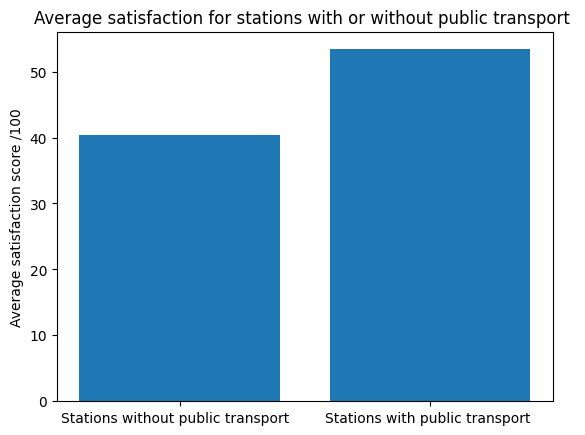

In [53]:
import matplotlib.pyplot as plt
plt.bar(["Stations without public transport  ", "Stations with public transport "], [facilities[facilities["transport_odd"] == 1]["Avg Satisfaction"].mean(), facilities[facilities["transport_odd"] == 0]["Avg Satisfaction"].mean()])
plt.title("Average satisfaction for stations with or without public transport ")
plt.ylabel("Average satisfaction score /100")

plt.show()



In [54]:
frequent_facilities = apriori(only_facilities, min_support=0.0000001, use_colnames = True)
frequent_facilities

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.868941,(ticket_vending_machine)
1,0.032316,(luggage_lockers)
2,0.700180,(free_parking)
3,0.078995,(taxi)
4,0.346499,(bicycle_spots)
...,...,...
284910,0.001795,"(wheelchair_available, taxi, elevated_platform..."
284911,0.001795,"(wheelchair_available, taxi, elevated_platform..."
284912,0.001795,"(wheelchair_available, taxi, elevated_platform..."
284913,0.001795,"(wheelchair_available, taxi, elevated_platform..."


In [55]:
# meaning of support
len(only_facilities[only_facilities["ticket_vending_machine"] == 1])/ only_facilities["ticket_vending_machine"].count()

0.8689407540394973

Prefer to cluster the stations based on logic

Stations with:
1. no facilities
2. bicycle facilities: bicycle spots, blue bike
3. transport facilities: bus, tram, metro,taxi, free_parking
4. facilities for people in wheelchair: wheelchair_available, ramp, disabled_parking_spots, elevated_platform, escalartor_up, escalator_down, elevator_platform

Some stations don't have any facilities

In [56]:

facilities["has_facilities"] = facilities[['ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop']].apply(lambda x: 1 if x.sum() >=1 else 0, axis=1)
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,odd,wheelchair_odd,transport_odd,esc_wheel_odd,parking_odd,bicycle_odd,Unnamed: 0,station,Avg Satisfaction,has_facilities
0,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,NaN,0,0,1,0,0,103,aalst,60.77,1
1,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,NaN,0,1,0,0,0,517,aalst-kerrebroek,49.97,1
2,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,NaN,1,0,0,0,0,353,aalter,60.18,1
3,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,NaN,0,0,1,0,0,569,aarschot,55.54,1
4,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,NaN,0,1,0,0,0,92,aarsele,27.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,NaN,1,1,0,0,0,559,zolder,57.43,1
522,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,NaN,1,1,0,0,0,495,zonhoven,39.39,1
523,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,NaN,0,0,1,0,0,276,zottegem,48.90,1
524,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,NaN,0,1,0,0,0,301,zwijndrecht,49.58,1


Bicycle facilities

In [57]:
facilities["has_bicycle_facilities"] = facilities[[ 'bicycle_spots', 'blue-bike']].apply(lambda x: 1 if x.sum() >=1 else 0, axis=1)
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,wheelchair_odd,transport_odd,esc_wheel_odd,parking_odd,bicycle_odd,Unnamed: 0,station,Avg Satisfaction,has_facilities,has_bicycle_facilities
0,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0,0,1,0,0,103,aalst,60.77,1,1
1,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,517,aalst-kerrebroek,49.97,1,0
2,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,1,0,0,0,0,353,aalter,60.18,1,1
3,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0,0,1,0,0,569,aarschot,55.54,1,1
4,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,92,aarsele,27.54,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,1,1,0,0,0,559,zolder,57.43,1,0
522,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,1,1,0,0,0,495,zonhoven,39.39,1,0
523,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0,0,1,0,0,276,zottegem,48.90,1,1
524,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,301,zwijndrecht,49.58,1,1


Transport facilities

In [61]:
facilities["has_transport_facilities"] = facilities[[ 'bus', 'tram', 'metro', "taxi", "free_parking", "luggage_lockers"]].apply(lambda x: 1 if x.sum() >=3 else 0, axis=1)
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,esc_wheel_odd,parking_odd,bicycle_odd,Unnamed: 0,station,Avg Satisfaction,has_facilities,has_bicycle_facilities,has_transport_facilities,has_disabeld_persons_facilities
0,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,1,0,0,103,aalst,60.77,1,1,1,1
1,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0,0,0,517,aalst-kerrebroek,49.97,1,0,0,0
2,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0,0,0,353,aalter,60.18,1,1,0,0
3,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,1,0,0,569,aarschot,55.54,1,1,0,0
4,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0,0,0,92,aarsele,27.54,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0,0,0,559,zolder,57.43,1,0,0,0
522,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0,0,0,495,zonhoven,39.39,1,0,0,0
523,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,1,0,0,276,zottegem,48.90,1,1,0,0
524,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0,0,0,301,zwijndrecht,49.58,1,1,0,0


Disabled persons facilities

In [62]:
facilities.columns

Index(['URI', 'name', 'street', 'zip', 'city', 'ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop',
       'sales_open_monday', 'sales_close_monday', 'sales_open_tuesday',
       'sales_close_tuesday', 'sales_open_wednesday', 'sales_close_wednesday',
       'sales_open_thursday', 'sales_close_thursday', 'sales_open_friday',
       'sales_close_friday', 'sales_open_saturday', 'sales_close_saturday',
       'sales_open_sunday', 'sales_close_sunday', 'odd_escalator', 'odd',
       'wheelchair_odd', 'transport_odd', 'esc_wheel_odd', 'parking_odd',
       'bicycle_odd', 'Unnamed: 0', 'station', 'Avg Satisfaction',
       'has_facilities', 'has_bicycle_facilities', 'has_transport_facilities',
       'has_disabeld_persons_facilities'],
     

In [63]:
facilities["has_disabeld_persons_facilities"] = facilities[[ 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop']].apply(lambda x: 1 if x.sum() >=4 else 0, axis=1)
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,esc_wheel_odd,parking_odd,bicycle_odd,Unnamed: 0,station,Avg Satisfaction,has_facilities,has_bicycle_facilities,has_transport_facilities,has_disabeld_persons_facilities
0,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,1,0,0,103,aalst,60.77,1,1,1,1
1,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0,0,0,517,aalst-kerrebroek,49.97,1,0,0,0
2,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0,0,0,353,aalter,60.18,1,1,0,0
3,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,1,0,0,569,aarschot,55.54,1,1,0,1
4,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0,0,0,92,aarsele,27.54,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0,0,0,559,zolder,57.43,1,0,0,0
522,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0,0,0,495,zonhoven,39.39,1,0,0,0
523,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,1,0,0,276,zottegem,48.90,1,1,0,1
524,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0,0,0,301,zwijndrecht,49.58,1,1,0,0


Create a code for the total kinds of facilities each station has

In [64]:
# facilities["Total facilities"] = facilities[['has_facilities', 'has_wheelchair_facilities','has_bicycle_facilities','has_transport_facilities']]\
#     .apply(lambda x: "Z" if x[0] == 0 else "".join([chr(65+i) for i in range(0,3) if x[i]]), axis=1)
# facilities



In [65]:
def get_facilities(x):
    if x[0] == 0:
        return "Z"
    # if all facilities are 0, then return A
    elif x[0] == 1 and x[1] == 0 and x[2] == 0 and x[3] == 0:
        return "A"
    # else, return the facilities that are available
    else:
        return "".join([chr(65+i) for i in range(1,4) if x[i]])

# apply the function to the facilities dataframe
facilities["Total facilities"] = facilities[['has_facilities', 'has_bicycle_facilities','has_transport_facilities', 'has_disabeld_persons_facilities' ]].apply(get_facilities, axis=1)
facilities


,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,parking_odd,bicycle_odd,Unnamed: 0,station,Avg Satisfaction,has_facilities,has_bicycle_facilities,has_transport_facilities,has_disabeld_persons_facilities,Total facilities
0,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0,0,103,aalst,60.77,1,1,1,1,BCD
1,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0,0,517,aalst-kerrebroek,49.97,1,0,0,0,A
2,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0,0,353,aalter,60.18,1,1,0,0,B
3,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0,0,569,aarschot,55.54,1,1,0,1,BD
4,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0,0,92,aarsele,27.54,1,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0,0,559,zolder,57.43,1,0,0,0,A
522,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0,0,495,zonhoven,39.39,1,0,0,0,A
523,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0,0,276,zottegem,48.90,1,1,0,1,BD
524,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0,0,301,zwijndrecht,49.58,1,1,0,0,B


Create the different clusters

In [66]:
facilities["Total facilities"].unique()

array(['BCD', 'A', 'B', 'BD', 'BC', 'Z', 'C', 'D'], dtype=object)

# Number of daily trains

In [67]:
trips = data.full_trips

In [68]:
daily_trains = trips["Name of the stop"].value_counts().reset_index().rename(columns={"index": "Name of the stop", "Name of the stop": "count"}).astype({"count": int})
# daily_trains["count"] = daily_trains["count"]/7
daily_trains["Name of the stop"]=daily_trains["Name of the stop"].str.lower()
daily_trains

,Name of the stop,count
0,brussel-zuid/bruxelles-midi,7421
1,brussel-noord/bruxelles-nord,6899
2,brussel-centraal/bruxelles-central,6892
3,brussel-kapellekerk/bruxelles-chapelle,6892
4,brussel-congres/bruxelles-congrès,6892
...,...,...
622,oostende-zeehaven,3
623,leuven-bundel m,2
624,hasselt-aflos l.35/1,1
625,gent-zeehaven,1


In [69]:
facilities = facilities.merge(daily_trains, left_on = "name", right_on="Name of the stop")
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,Unnamed: 0,station,Avg Satisfaction,has_facilities,has_bicycle_facilities,has_transport_facilities,has_disabeld_persons_facilities,Total facilities,Name of the stop,count
0,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,103,aalst,60.77,1,1,1,1,BCD,aalst,1262
1,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,517,aalst-kerrebroek,49.97,1,0,0,0,A,aalst-kerrebroek,70
2,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,353,aalter,60.18,1,1,0,0,B,aalter,1285
3,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,569,aarschot,55.54,1,1,0,1,BD,aarschot,1250
4,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,92,aarsele,27.54,1,0,0,0,A,aarsele,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,559,zolder,57.43,1,0,0,0,A,zolder,217
522,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,495,zonhoven,39.39,1,0,0,0,A,zonhoven,217
523,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,276,zottegem,48.90,1,1,0,1,BD,zottegem,974
524,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,301,zwijndrecht,49.58,1,1,0,0,B,zwijndrecht,827


In [77]:
df = facilities.groupby("Total facilities")["count"].mean().reset_index()
df

,Total facilities,count
0,A,598.971338
1,B,575.936364
2,BC,1102.666667
3,BCD,1640.692308
4,BD,995.656250
5,C,775.571429
6,D,704.000000
7,Z,497.619048


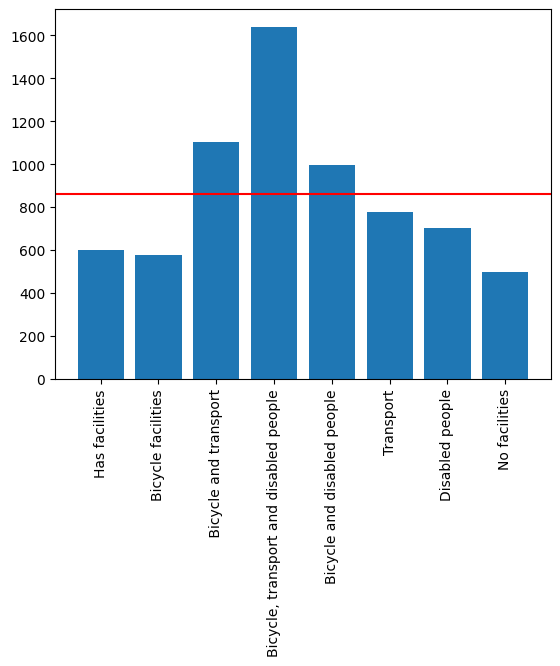

In [84]:
plt.bar(df["Total facilities"], df["count"])
plt.xticks(["A", "B", "BC", "BCD", "BD", "C", "D", "Z"], ["Has facilities", "Bicycle facilities", " Bicycle and transport", "Bicycle, transport and disabled people", "Bicycle and disabled people", "Transport", "Disabled people", "No facilities"])
plt.xticks(rotation = 90)
plt.axhline(df["count"].mean(), color = "red")

In [87]:
stations = data.stations
stations["name"] = stations["name"].str.lower()
df2 = facilities.merge(stations, left_on = "Name of the stop", right_on = "name")
df2

,URI_x,name_x,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,Total facilities,Name of the stop,count,URI_y,name_y,country-code,longitude,latitude,avg_stop_times,official_transfer_time
0,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,BCD,aalst,1262,008895000,aalst,be,4.039653,50.942813,157.425373,300.0
1,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,A,aalst-kerrebroek,70,008895125,aalst-kerrebroek,be,4.024407,50.948377,7.731343,300.0
2,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,B,aalter,1285,008891140,aalter,be,3.447848,51.092295,188.276119,240.0
3,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,BD,aarschot,1250,008833209,aarschot,be,4.824043,50.984406,171.664179,240.0
4,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,A,aarsele,268,008892288,aarsele,be,3.418363,50.984460,37.365672,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,A,zolder,217,008832250,zolder,be,5.329900,51.033548,30.910448,300.0
522,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,A,zonhoven,217,008832334,zonhoven,be,5.348815,50.989557,30.910448,300.0
523,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,BD,zottegem,974,008895208,zottegem,be,3.814410,50.869102,161.223881,240.0
524,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,B,zwijndrecht,827,008894821,zwijndrecht,be,4.329780,51.214108,150.514925,300.0


All the different stations clustered by color on a map

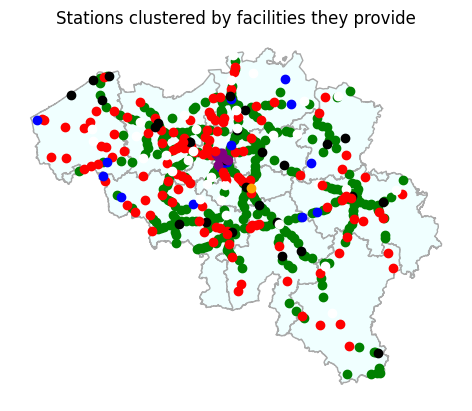

In [122]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
plt.scatter(df2[df2["Total facilities"] == "A"]["longitude"], df2[df2["Total facilities"] == "A"]["latitude"], color = "green")
plt.scatter(df2[df2["Total facilities"] == "B"]["longitude"], df2[df2["Total facilities"] == "B"]["latitude"], color = "red")
plt.scatter(df2[df2["Total facilities"] == "BC"]["longitude"], df2[df2["Total facilities"] == "BC"]["latitude"], color = "blue")
plt.scatter(df2[df2["Total facilities"] == "BCD"]["longitude"], df2[df2["Total facilities"] == "BCD"]["latitude"], color = "black")
plt.scatter(df2[df2["Total facilities"] == "BD"]["longitude"], df2[df2["Total facilities"] == "BD"]["latitude"], color = "white")
plt.scatter(df2[df2["Total facilities"] == "C"]["longitude"], df2[df2["Total facilities"] == "C"]["latitude"], color = "purple")
plt.scatter(df2[df2["Total facilities"] == "D"]["longitude"], df2[df2["Total facilities"] == "D"]["latitude"], color = "orange")
plt.scatter(df2[df2["Total facilities"] == "Z"]["longitude"], df2[df2["Total facilities"] == "Z"]["latitude"], color = "#ff0000")
ax.axis('off')
plt.title("Stations clustered by facilities they provide" )
plt.show()

Green to red, green: most types facilities, red no facilities

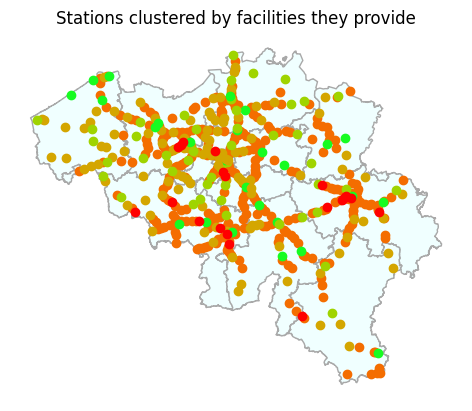

In [124]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
plt.scatter(df2[df2["Total facilities"] == "A"]["longitude"], df2[df2["Total facilities"] == "A"]["latitude"], color = "#f46d00")
plt.scatter(df2[df2["Total facilities"] == "B"]["longitude"], df2[df2["Total facilities"] == "B"]["latitude"], color = "#d4a600")
plt.scatter(df2[df2["Total facilities"] == "BC"]["longitude"], df2[df2["Total facilities"] == "BC"]["latitude"], color = "#9fd400")
plt.scatter(df2[df2["Total facilities"] == "BCD"]["longitude"], df2[df2["Total facilities"] == "BCD"]["latitude"], color = "#16fc21")
plt.scatter(df2[df2["Total facilities"] == "BD"]["longitude"], df2[df2["Total facilities"] == "BD"]["latitude"], color = "#9fd400")
plt.scatter(df2[df2["Total facilities"] == "C"]["longitude"], df2[df2["Total facilities"] == "C"]["latitude"], color = "#d4a600")
plt.scatter(df2[df2["Total facilities"] == "D"]["longitude"], df2[df2["Total facilities"] == "D"]["latitude"], color = "#d4a600")
plt.scatter(df2[df2["Total facilities"] == "Z"]["longitude"], df2[df2["Total facilities"] == "Z"]["latitude"], color = "#ff0000")
ax.axis('off')
plt.title("Stations clustered by facilities they provide" )
plt.show()

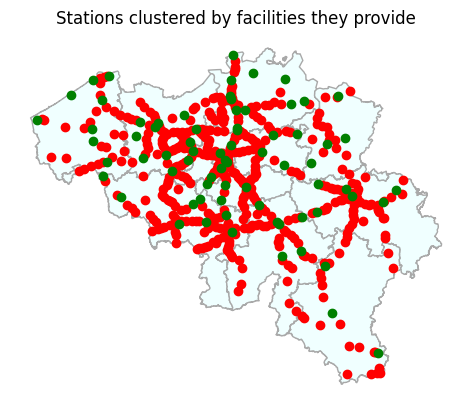

In [103]:
fig, ax = plt.subplots()
data.provinces.plot(ax=ax, color = "#F0FFFF", edgecolor = "darkgrey")
plt.scatter(df2[df2["Total facilities"] == "A"]["longitude"], df2[df2["Total facilities"] == "A"]["latitude"], color = "red")
plt.scatter(df2[df2["Total facilities"] == "B"]["longitude"], df2[df2["Total facilities"] == "B"]["latitude"], color = "red")
plt.scatter(df2[df2["Total facilities"] == "BC"]["longitude"], df2[df2["Total facilities"] == "BC"]["latitude"], color = "green", zorder = 2)
plt.scatter(df2[df2["Total facilities"] == "BCD"]["longitude"], df2[df2["Total facilities"] == "BCD"]["latitude"], color = "green", zorder= 2)
plt.scatter(df2[df2["Total facilities"] == "BD"]["longitude"], df2[df2["Total facilities"] == "BD"]["latitude"], color = "green", zorder =2)
plt.scatter(df2[df2["Total facilities"] == "C"]["longitude"], df2[df2["Total facilities"] == "C"]["latitude"], color = "red")
plt.scatter(df2[df2["Total facilities"] == "D"]["longitude"], df2[df2["Total facilities"] == "D"]["latitude"], color = "red")
plt.scatter(df2[df2["Total facilities"] == "Z"]["longitude"], df2[df2["Total facilities"] == "Z"]["latitude"], color = "red")
ax.axis('off')
plt.title("Stations clustered by facilities they provide" )
plt.show()

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0.0, 0, 'Has facilities'),
  Text(1.0, 0, 'Bicycle facilities'),
  Text(2.0, 0, ' Bicycle and transport'),
  Text(3.0, 0, 'Bicycle, transport and disabled people'),
  Text(4.0, 0, 'Bicycle and disabled people'),
  Text(5.0, 0, 'Transport'),
  Text(6.0, 0, 'Disabled people'),
  Text(7.0, 0, 'No facilities')])

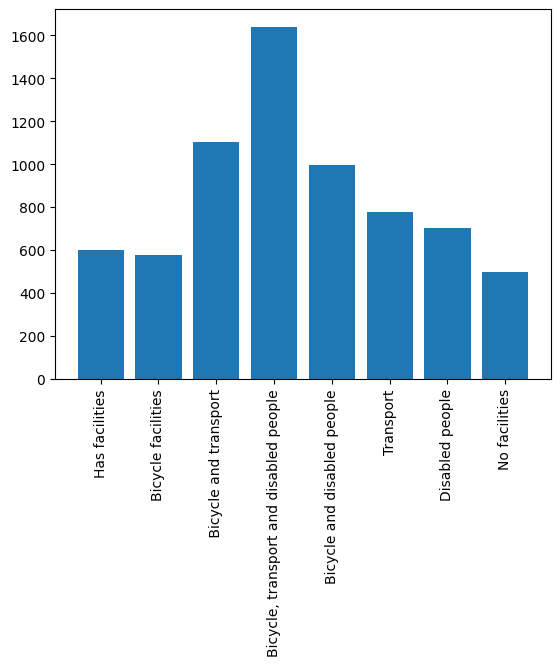

In [113]:
facilities.groupby("Total facilities")["count"].mean().reset_index()
plt.bar(facilities.groupby("Total facilities")["count"].mean().reset_index()["Total facilities"] , facilities.groupby("Total facilities")["count"].mean().reset_index()["count"])
plt.xticks(["A", "B", "BC", "BCD", "BD", "C", "D", "Z"], ["Has facilities", "Bicycle facilities", " Bicycle and transport", "Bicycle, transport and disabled people", "Bicycle and disabled people", "Transport", "Disabled people", "No facilities"])
plt.xticks(rotation = 90)



# From here on we will do some extra analysis

# 1. Correlation station type and number of delays?

In [104]:
stations_total_delay_time = trips.groupby("Name of the stop")["Delay time"].mean().reset_index().rename(columns={"Delay time": "Total delay time"})
stations_total_delay_time

,Name of the stop,Total delay time
0,aalst,105.011094
1,aalst-kerrebroek,45.842857
2,aalter,91.692607
3,aarschot,63.912800
4,aarsele,130.149254
...,...,...
622,zolder-kruissporen,111.341014
623,zonhoven,127.529954
624,zottegem,79.887064
625,zwijndrecht,125.429262


In [105]:
facilities = facilities.merge(stations_total_delay_time, left_on = "name", right_on="Name of the stop")
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,Avg Satisfaction,has_facilities,has_bicycle_facilities,has_transport_facilities,has_disabeld_persons_facilities,Total facilities,Name of the stop_x,count,Name of the stop_y,Total delay time
0,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,60.77,1,1,1,1,BCD,aalst,1262,aalst,105.011094
1,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,49.97,1,0,0,0,A,aalst-kerrebroek,70,aalst-kerrebroek,45.842857
2,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,60.18,1,1,0,0,B,aalter,1285,aalter,91.692607
3,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,55.54,1,1,0,1,BD,aarschot,1250,aarschot,63.912800
4,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,27.54,1,0,0,0,A,aarsele,268,aarsele,130.149254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,57.43,1,0,0,0,A,zolder,217,zolder,111.460829
522,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,39.39,1,0,0,0,A,zonhoven,217,zonhoven,127.529954
523,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,48.90,1,1,0,1,BD,zottegem,974,zottegem,79.887064
524,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,49.58,1,1,0,0,B,zwijndrecht,827,zwijndrecht,125.429262


Not really a correlation between the type of station and mean delay time.

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0.0, 0, 'Has facilities'),
  Text(1.0, 0, 'Bicycle facilities'),
  Text(2.0, 0, ' Bicycle and transport'),
  Text(3.0, 0, 'Bicycle, transport and disabled people'),
  Text(4.0, 0, 'Bicycle and disabled people'),
  Text(5.0, 0, 'Transport'),
  Text(6.0, 0, 'Disabled people'),
  Text(7.0, 0, 'No facilities')])

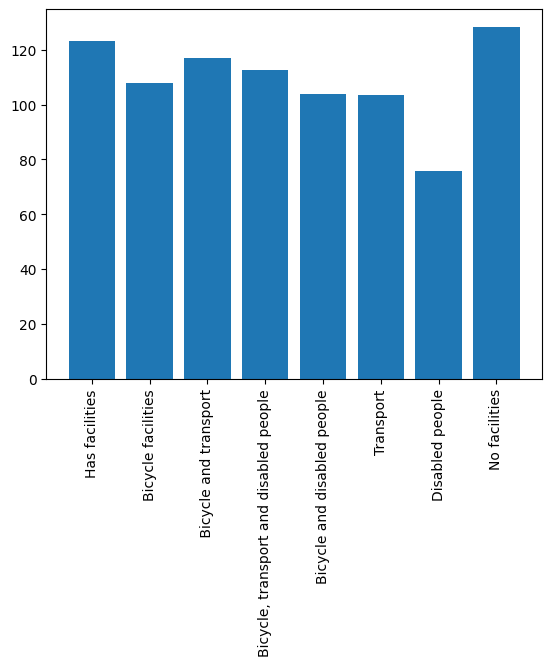

In [116]:
plt.bar(facilities.groupby("Total facilities")["Total delay time"].mean().reset_index()["Total facilities"] , facilities.groupby("Total facilities")["Total delay time"].mean().reset_index()["Total delay time"])
plt.xticks(["A", "B", "BC", "BCD", "BD", "C", "D", "Z"], ["Has facilities", "Bicycle facilities", " Bicycle and transport", "Bicycle, transport and disabled people", "Bicycle and disabled people", "Transport", "Disabled people", "No facilities"])
plt.xticks(rotation = 90)


